In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

In [2]:
#Lendo e transformando o arquivo CSV em um objeto pandas DataFrame nomeado de "df"
dff = pd.read_csv('C:/Users/juan_/Documents/GitHub/Datasets/demand.csv')

In [3]:
#Verificando o head e tail do CSV
dff

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [4]:
#Analisando algumas informações a respeito do DataFrame
dff.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [5]:
#Verificando a existência de dados não preenchidos no DataFrame
dff.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [6]:
#Verificando a relação de dados faltantes com o total de dados
x = (11239/1048575)*100
print(f'Os dados faltantes equivalem à {round(x,3)}% do total dos dados do DataFrame')

Os dados faltantes equivalem à 1.072% do total dos dados do DataFrame


In [7]:
#Os dados não preenchidos beiram 1% do total dos dados, sendo assim, resolvi dropar os dados. 
#Outro motivo para dropar os dados é que não era possível estimar os dados faltantes.

#Dropando as linhas dos dados faltantes e atualizando o DF.
dff.dropna(inplace=True)
dff.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [8]:
#Não está no notebook, mas alguns números possuíam parenteses, o código abaixo é para retirar esses parenteses (servirá lá na frente)
dff['Order_Demand']=dff['Order_Demand'].str.replace('(','',regex=True)
dff['Order_Demand']=dff['Order_Demand'].str.replace(')','',regex=True)

In [9]:
#O código abaixo separa os valores das datas, e após isso, cada valor é atribuído a uma nova coluna no DataFrame
dff[['Year','Month','Day']] = dff['Date'].str.split("/", expand = True)
dff[['Month']] = dff[['Month']].astype(int)
dff[['Year']] = dff[['Year']].astype(int)
#df[['Day']] = df[['Day']].astype(int)

#A retirada dos parenteses dos números foi necessário na hora de converter a coluna "Order_Demand" de str para int
dff[['Order_Demand']] = dff[['Order_Demand']].astype(int)

In [10]:
#Ordenando o DataFrame pela Data
dff.sort_values('Date', inplace=True)
dff.reset_index(inplace=True)
dff.drop('index',axis=1,inplace=True)
dff

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0965,Whse_A,Category_006,2011/1/8,2,2011,1,8
1,Product_0412,Whse_S,Category_007,2011/10/20,2,2011,10,20
2,Product_0125,Whse_S,Category_011,2011/10/20,2,2011,10,20
3,Product_0642,Whse_C,Category_019,2011/10/31,3,2011,10,31
4,Product_2137,Whse_S,Category_009,2011/11/18,25,2011,11,18
...,...,...,...,...,...,...,...,...
1037331,Product_0689,Whse_J,Category_011,2017/1/6,200,2017,1,6
1037332,Product_1970,Whse_J,Category_005,2017/1/6,2000,2017,1,6
1037333,Product_1904,Whse_C,Category_019,2017/1/9,4000,2017,1,9
1037334,Product_0471,Whse_C,Category_015,2017/1/9,30,2017,1,9


In [11]:
#Verificando a quantidade de registros de cada armazens
dff[['Warehouse']].value_counts()

Warehouse
Whse_J       764447
Whse_A       142335
Whse_S        88200
Whse_C        42354
dtype: int64

In [12]:
#Analisando os dados do DataFrame original
xdf = dff['Order_Demand'].sum()
print(dff.nunique())
print(f'\nTotal of Order Demands: {xdf}')

Product_Code        2160
Warehouse              4
Product_Category      33
Date                1729
Order_Demand        3309
Year                   7
Month                 12
Day                   31
dtype: int64

Total of Order Demands: 5134173931


In [13]:
df_prod = dff[['Product_Code','Order_Demand','Date','Month','Year']]
df_prod

,Product_Code,Order_Demand,Date,Month,Year
0,Product_0965,2,2011/1/8,1,2011
1,Product_0412,2,2011/10/20,10,2011
2,Product_0125,2,2011/10/20,10,2011
3,Product_0642,3,2011/10/31,10,2011
4,Product_2137,25,2011/11/18,11,2011
...,...,...,...,...,...
1037331,Product_0689,200,2017/1/6,1,2017
1037332,Product_1970,2000,2017/1/6,1,2017
1037333,Product_1904,4000,2017/1/9,1,2017
1037334,Product_0471,30,2017/1/9,1,2017


In [14]:
df = df_prod[(df_prod['Product_Code']=='Product_1359')]
df['Test'] = df['Year'].map(str) +'/'+ df['Month'].map(str)
df

<ipython-input-14-33d058c403bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Test'] = df['Year'].map(str) +'/'+ df['Month'].map(str)


,Product_Code,Order_Demand,Date,Month,Year,Test
668,Product_1359,75000,2012/1/10,1,2012,2012/1
669,Product_1359,5000,2012/1/10,1,2012,2012/1
716,Product_1359,200000,2012/1/10,1,2012,2012/1
724,Product_1359,50000,2012/1/10,1,2012,2012/1
748,Product_1359,10000,2012/1/10,1,2012,2012/1
...,...,...,...,...,...,...
1037035,Product_1359,1000,2016/9/9,9,2016,2016/9
1037047,Product_1359,2000,2016/9/9,9,2016,2016/9
1037098,Product_1359,25000,2016/9/9,9,2016,2016/9
1037112,Product_1359,10000,2016/9/9,9,2016,2016/9


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-15-b9c6864122be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [16]:
df = df.groupby(by=['Test']).sum()
df.drop(columns=['Month','Year'],inplace=True)

In [17]:
df.reset_index(inplace=True)
df

,Test,Order_Demand
0,2012/1,8911000
1,2012/10,7685000
2,2012/11,7894000
3,2012/12,8302000
4,2012/2,8131000
...,...,...
56,2016/6,7870000
57,2016/7,7108000
58,2016/8,6934000
59,2016/9,6960000


In [18]:
df['Date'] = pd.to_datetime(df['Test'])
df

,Test,Order_Demand,Date
0,2012/1,8911000,2012-01-01
1,2012/10,7685000,2012-10-01
2,2012/11,7894000,2012-11-01
3,2012/12,8302000,2012-12-01
4,2012/2,8131000,2012-02-01
...,...,...,...
56,2016/6,7870000,2016-06-01
57,2016/7,7108000,2016-07-01
58,2016/8,6934000,2016-08-01
59,2016/9,6960000,2016-09-01


In [19]:
df['ds'] = df['Date']
df['y'] = df['Order_Demand']
df.drop(columns=['Test','Order_Demand','Date'],inplace=True)

In [75]:
df.head(60)

,ds,y
0,2012-01-01,8911000
1,2012-10-01,7685000
2,2012-11-01,7894000
3,2012-12-01,8302000
4,2012-02-01,8131000
5,2012-03-01,7775000
6,2012-04-01,8960000
7,2012-05-01,8475000
8,2012-06-01,6556000
9,2012-07-01,7422000


In [91]:
train=df[:57]
test=df[:60]
test

,ds,y
0,2012-01-01,8911000
1,2012-10-01,7685000
2,2012-11-01,7894000
3,2012-12-01,8302000
4,2012-02-01,8131000
5,2012-03-01,7775000
6,2012-04-01,8960000
7,2012-05-01,8475000
8,2012-06-01,6556000
9,2012-07-01,7422000


In [96]:
m=Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
future = m.make_future_dataframe(periods=5 , freq='M') 

In [98]:
forecast = m.predict(future) 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
57,2016-12-31,7.941439e+06,6.837032e+06,9.050497e+06,7.228012e+06,7.228012e+06,7.228013e+06
58,2017-01-31,6.406847e+06,5.349658e+06,7.549148e+06,7.209608e+06,7.209604e+06,7.209610e+06
59,2017-02-28,7.736260e+06,6.605333e+06,8.801801e+06,7.192984e+06,7.192977e+06,7.192989e+06
60,2017-03-31,8.100281e+06,7.000497e+06,9.114032e+06,7.174579e+06,7.174567e+06,7.174587e+06
61,2017-04-30,6.578753e+06,5.449563e+06,7.564916e+06,7.156768e+06,7.156751e+06,7.156780e+06


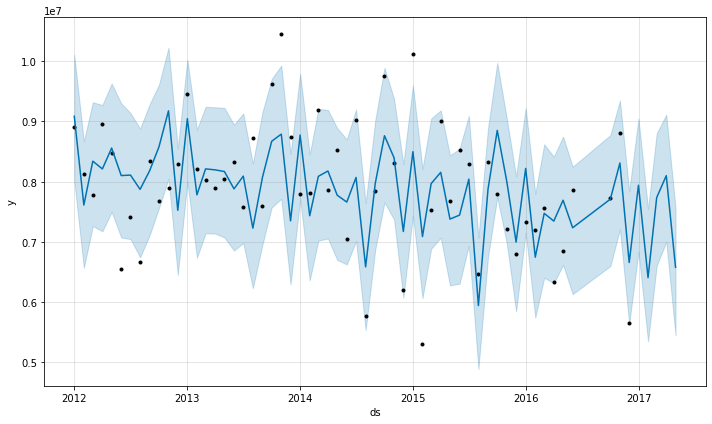

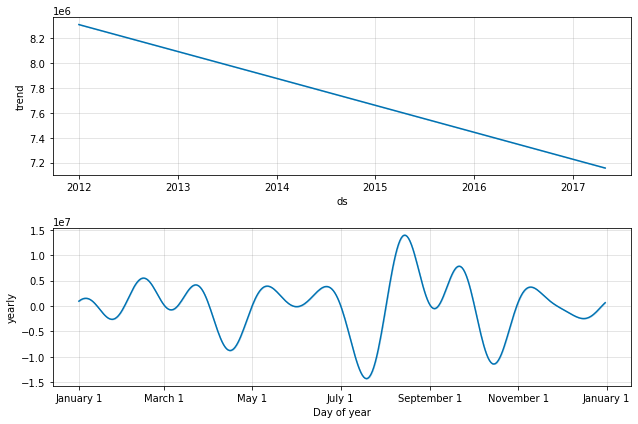

In [99]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

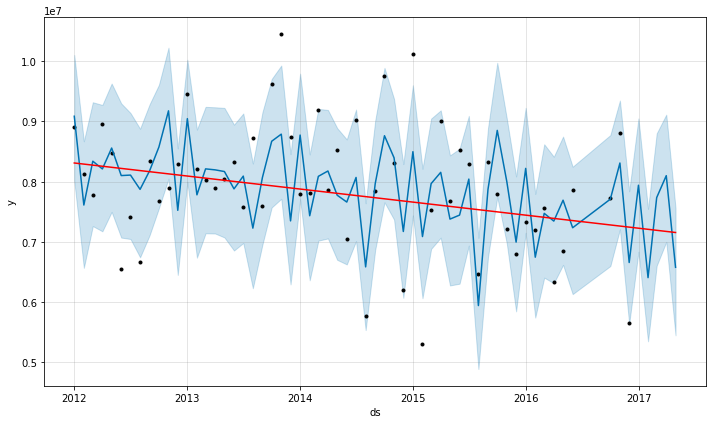

In [100]:
fig = m.plot(forecast) 

a = add_changepoints_to_plot(fig.gca(), m, forecast)

<AxesSubplot:xlabel='ds'>

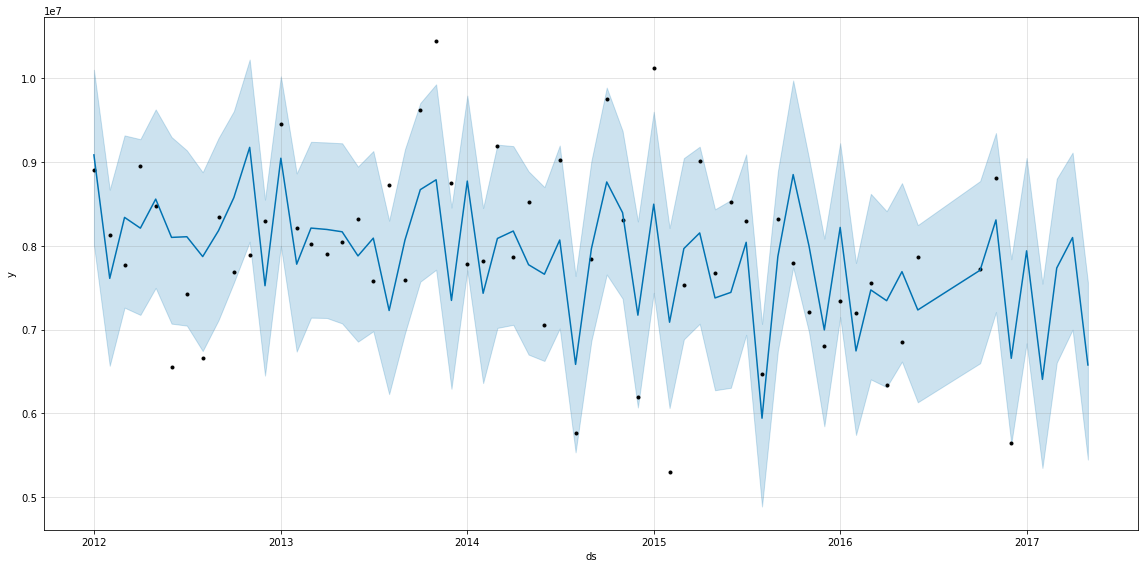

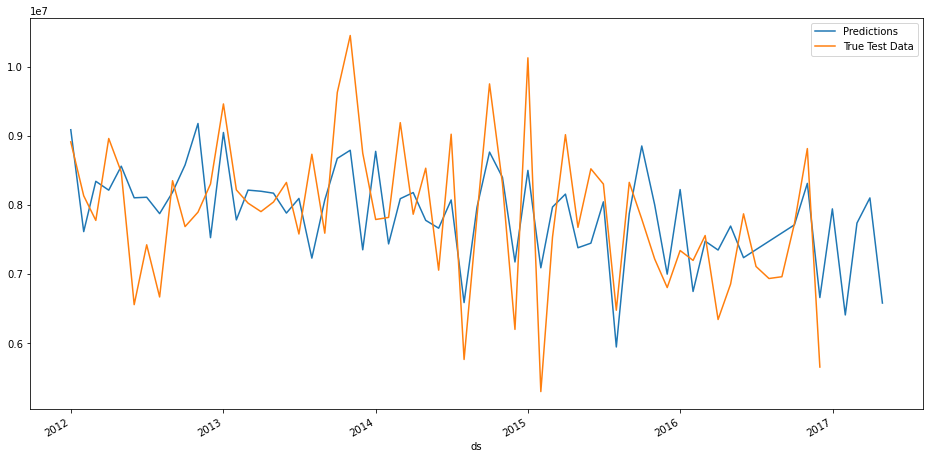

In [101]:
m.plot(forecast,figsize=(16,8))
ax=forecast.plot(x='ds',y='yhat',legend=True,label='Predictions',figsize=(16,8))
test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax)